# Titanic: Machine Learning from Disaster

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import re
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data exploration / Feature Engineering:

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


For the training data, Age is missing 177 entries, Cabin is missing 687 and Embarked is missing 2

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


For the test data, Age is missing 86 entries, Cabin is missing 326

In [5]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
549/(549+342) # There is a 61% death rate

0.6161616161616161

Splitting numerical and categorical data: <br>

In [7]:
catdata = ["Pclass","Sex","SibSp","Parch","Cabin","Embarked"]
numdata = ["Age","Fare"]

Lets make a function to graph certain columns against survival!

In [8]:
def graph(column):
    train.pivot_table('PassengerId', column, 'Survived', 'count').plot(kind="bar")

# Sex, Pclass and Embarked

We don't need to apply any feature engineering to these categories, as their trends are clearly seen

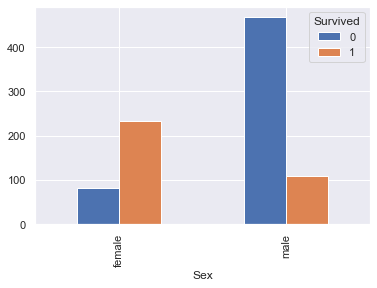

In [9]:
graph("Sex")

Shows a large bias towards women surviving, a large amount of deaths are from males

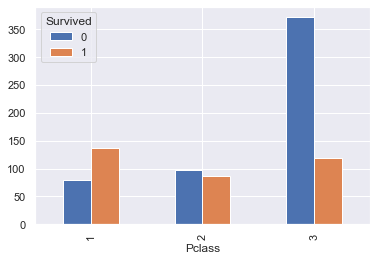

In [10]:
graph("Pclass")

1st class has a slight favour over the rest, and many of the deaths are from people in 3rd class

Similarly, a slight favour for people who came with one parent

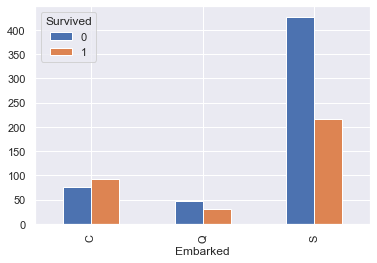

In [11]:
graph("Embarked")

A large proportion of passengers are from S, there is a slight favour for people from embarked from C <br>
Since there are 2 missing entries in embarked, lets fill them with the most common entry, which is S

In [12]:
train["Embarked"] = train.Embarked.apply(lambda x : "S" if pd.isna(x)==True else x)

# Age exploration:

Text(0.5, 1.0, 'Age distribution')

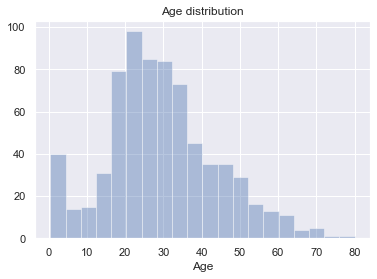

In [13]:
sns.distplot(a=train["Age"], kde=False, bins=20)  
plt.title("Age distribution")

(55, 80)

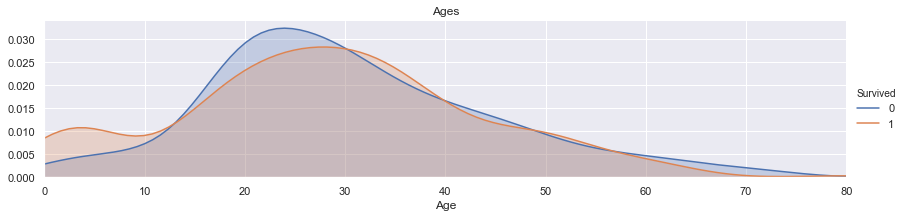

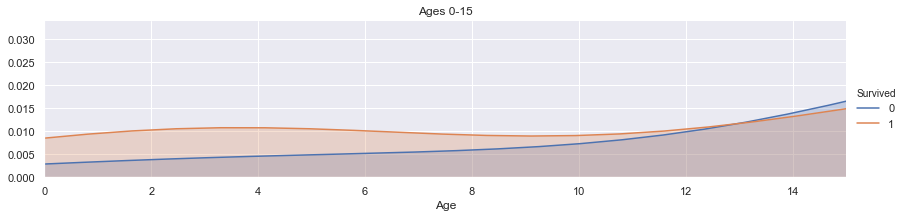

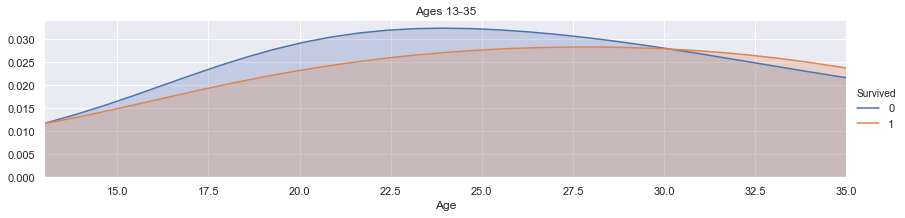

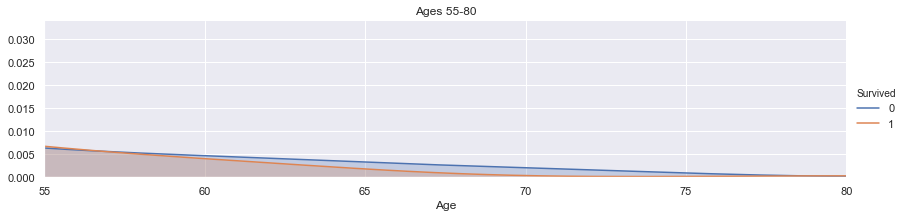

In [14]:
age_graph1 = sns.FacetGrid(train, hue="Survived",aspect=4)
age_graph1.map(sns.kdeplot,'Age',shade= True)
age_graph1.add_legend()
plt.title("Ages")
plt.xlim(0,80)

age_graph2 = sns.FacetGrid(train, hue="Survived",aspect=4)
age_graph2.map(sns.kdeplot,'Age',shade= True)
age_graph2.add_legend()
plt.title("Ages 0-15")
plt.xlim(0,15)

age_graph3 = sns.FacetGrid(train, hue="Survived",aspect=4)
age_graph3.map(sns.kdeplot,'Age',shade= True)
age_graph3.add_legend()
plt.title("Ages 13-35")
plt.xlim(13,35)

age_graph4 = sns.FacetGrid(train, hue="Survived",aspect=4)
age_graph4.map(sns.kdeplot,'Age',shade= True)
age_graph4.add_legend()
plt.title("Ages 55-80")
plt.xlim(55,80)

There is a small bump of young children (ages 0-13) <br>
The survival of young children is seen in this table, 42 out of 71 children survived which is a survival chance of 59%

In [15]:
print(42/(42+29)*100)
train[train["Age"]<=13]["Survived"].value_counts()

59.154929577464785


1    42
0    29
Name: Survived, dtype: int64

There is a significant discrepancy for ages 14-30, giving a 63% chance of death

In [16]:
print(214/(214+124)*100)
train[train["Age"].between(14,30)]["Survived"].value_counts()

63.31360946745562


0    214
1    124
Name: Survived, dtype: int64

The survival chances of ages 31-56 do not have any significant trends, chance of death is 57%

In [17]:
print(154/(154+114)*100)
train[train["Age"].between(31,56)]["Survived"].value_counts()

57.46268656716418


0    154
1    114
Name: Survived, dtype: int64

And the elderly 57 above have a 71% chance of death

In [18]:
print(25/(25+10)*100)
train[train["Age"]>=57]["Survived"].value_counts()

71.42857142857143


0    25
1    10
Name: Survived, dtype: int64

Passengers with no age listed have a 70% chance of death

In [19]:
print(125/(125+52))
train[train["Age"].isna()]["Survived"].value_counts()

0.7062146892655368


0    125
1     52
Name: Survived, dtype: int64

So when processing the data, it could be useful to sort the ages into 5 categories: <br>
Age<=13  , 14<=Age<=30  , 31<=Age<=57 , Age>=57 , Missing Age

# Age Feature Engineering:

In [20]:
def age(x):
    if x <=13:
        return "Child"
    elif 14 <= x <= 30:
        return "YoungAdult"
    elif 31 <= x <= 56:
        return "OldAdult"
    elif x >=57:
        return "Elderly"
    else:
        return "None"

In [21]:
train["AgeGroup"] = train.Age.apply(lambda x: age(x))
train.pivot_table('PassengerId', "AgeGroup", 'Survived', 'count')

Survived,0,1
AgeGroup,,
Child,29,42
Elderly,25,10
None,127,52
OldAdult,154,114
YoungAdult,214,124


# Fare exploration:

(15, 100)

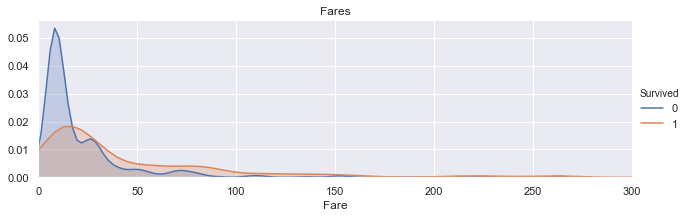

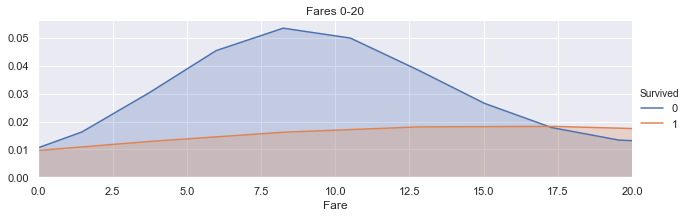

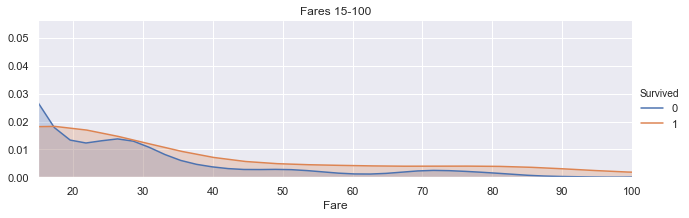

In [22]:
fare_graph1 = sns.FacetGrid(train, hue="Survived",aspect=3)
fare_graph1.map(sns.kdeplot,'Fare',shade= True)
fare_graph1.add_legend()
plt.title("Fares")
plt.xlim(0,300)

fare_graph2 = sns.FacetGrid(train, hue="Survived",aspect=3)
fare_graph2.map(sns.kdeplot,'Fare',shade= True)
fare_graph2.add_legend()
plt.title("Fares 0-20")
plt.xlim(0,20)

fare_graph3 = sns.FacetGrid(train, hue="Survived",aspect=3)
fare_graph3.map(sns.kdeplot,'Fare',shade= True)
fare_graph3.add_legend()
plt.title("Fares 15-100")
plt.xlim(15,100)

From fares 0 to about 17 there is a large peak of more deaths, 74% chance

In [23]:
print(369/(369+133)*100)
train[train["Fare"].between(0,18)]["Survived"].value_counts()

73.50597609561753


0    369
1    133
Name: Survived, dtype: int64

After the large peak, a larger proportion of higher fares gives more survivors, 53% survival

In [24]:
print(209/(209+183)*100)
train[train["Fare"]>=18]["Survived"].value_counts()

53.316326530612244


1    209
0    183
Name: Survived, dtype: int64

# Fare Feature Engineering

We can split the data into 2 categories in this way

In [25]:
def fare(x):
    if x <=18:
        return "Cheap"
    if x>=18:
        return "Expensive"

In [26]:
train["FareGroup"] = train.Fare.apply(lambda x: fare(x))
train.pivot_table('PassengerId', "FareGroup", 'Survived', 'count')

Survived,0,1
FareGroup,,
Cheap,369,133
Expensive,180,209


In [27]:
train["FareGroup"].value_counts()

Cheap        502
Expensive    389
Name: FareGroup, dtype: int64

# Cabin

In [28]:
train["Cabin"].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
C22 C26        3
F33            3
              ..
C90            1
A31            1
B73            1
B42            1
C70            1
Name: Cabin, Length: 147, dtype: int64

There are too many cabins, we need to group them up by the letter at the start:

Collecting cabin names, all empty cabins are named "N"

In [29]:
train["CabinName"] = train.Cabin.apply(lambda x : str(x)[0] if pd.isna(x)==False else "N")
train.pivot_table('PassengerId', "CabinName", 'Survived', 'count')

Survived,0,1
CabinName,,
A,8.0,7.0
B,12.0,35.0
C,24.0,35.0
D,8.0,25.0
E,8.0,24.0
F,5.0,8.0
G,2.0,2.0
N,481.0,206.0
T,1.0,NaN


# Cabin Feature Engineering

Looking at this table, we should keep B, C, D and E in separate groups. All other groups should be merged with N as they dont provide you with significant percentages

In [30]:
train["CabinName"] = train.CabinName.apply(lambda x : x if x in ["B","C","D","E"] else "N")
train.pivot_table('PassengerId', "CabinName", 'Survived', 'count')

Survived,0,1
CabinName,,
B,12,35
C,24,35
D,8,25
E,8,24
N,497,223


# Family Size

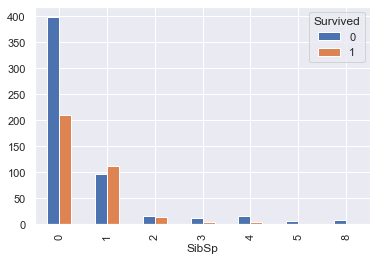

In [31]:
graph("SibSp")

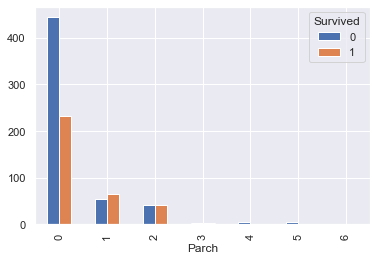

In [32]:
graph("Parch")

# Family Size Feature Engineering

We can combine these two sets of data to create categories for family size:

In [33]:
train['FamilySize'] = train['Parch'] + train['SibSp'] + 1

In [34]:
train.pivot_table('PassengerId', "FamilySize", 'Survived', 'count')

Survived,0,1
FamilySize,,
1,374.0,163.0
2,72.0,89.0
3,43.0,59.0
4,8.0,21.0
5,12.0,3.0
6,19.0,3.0
7,8.0,4.0
8,6.0,NaN
11,7.0,NaN


You can see that people who travelled alone have a high death count. <br>
Surprisingly, the death count for famiies of 2-4 have a higher survival count than death count

Hence we can group family size accordingly:
 -  Alone : size = 1
 -  Small famliy: 2<=size<=4
 -  Large family: size>=5

In [35]:
def familysize(x):
    if x == 1:
        return ("Alone")
    if 2<=x<=4:
        return ("SmallFamily")
    if x >=5:
        return ("LargeFamily")

In [36]:
train['FamilySize'] = train['FamilySize'].map(lambda x : familysize(x))

In [37]:
train.pivot_table('PassengerId', "FamilySize", 'Survived', 'count')

Survived,0,1
FamilySize,,
Alone,374,163
LargeFamily,52,10
SmallFamily,123,169


# Name Feature Engineering

There are too many names, but we can take out different titles and analyse them:

In [38]:
train["Title"] = train['Name'].apply(lambda x: re.findall(' ([a-zA-Z]+)\.', x)[0])

In [39]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Mme           1
Don           1
Jonkheer      1
Capt          1
Sir           1
Ms            1
Lady          1
Name: Title, dtype: int64

We can group these people into specific categores:
 - Mr
 - Miss
 - Mrs
 - Master
 - Important
 - Noble

In [40]:
nameassign = {
    "Mr" : "Mr",
    "Miss" : "Miss",
    "Mrs" : "Mrs",
    "Master" : "Master",
    "Dr" : "Gov",
    "Rev" : "Gov",
    "Col" : "Gov",
    "Major" : "Gov",
    "Mlle" : "Mrs",
    "Countess" :"Noble",
    "Mme" : "Mrs",
    "Lady" : "Noble",
    "Ms" : "Mrs",
    "Don" : "Noble",
    "Sir" : "Noble",
    "Capt" : "Gov",
    "Jonkheer" : "Noble",
}
train["Title"] = train['Title'].apply(lambda x: nameassign[x])

In [41]:
train.pivot_table('PassengerId', "Title", 'Survived', 'count')

Survived,0,1
Title,,
Gov,13,5
Master,17,23
Miss,55,127
Mr,436,81
Mrs,26,103
Noble,2,3


# Modeling

We now have the categories we want our model to use:

In [107]:
Categories = ["Pclass","Sex","FamilySize","FareGroup","AgeGroup","Embarked","CabinName","Title"]

In [108]:
X = train[Categories]
X = pd.get_dummies(X)

y = train["Survived"]

In [109]:
from sklearn.model_selection import train_test_split 
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)  # Splits data into training/validation data

In [110]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)

dt.fit(train_X,train_y)   

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [111]:
prediction = dt.predict(val_X)

In [112]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(val_y, prediction)

0.21076233183856502

## Tuned Model:

In [137]:
finaldt = DecisionTreeClassifier(random_state=0)

finaldt.fit(train_X,train_y) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# Final

In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  AgeGroup     418 non-null    object 
 12  FareGroup    418 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 42.6+ KB


Age is missing entries, Fare is missing one entry and Cabin is missing entries

We just need to apply our feature engineering to this data

In [82]:
# Age
test["AgeGroup"] = test.Age.apply(lambda x: age(x))
test["AgeGroup"].value_counts()

YoungAdult    172
OldAdult      113
None           86
Child          28
Elderly        19
Name: AgeGroup, dtype: int64

In [83]:
# Fare
test["FareGroup"] = test.Fare.apply(lambda x: fare(x))
test["FareGroup"] = test.FareGroup.apply(lambda x: "Cheap" if pd.isna(x) == True else x) # Filling the missing entry
test["FareGroup"].value_counts()

Cheap        238
Expensive    180
Name: FareGroup, dtype: int64

In [84]:
#Cabin
test["CabinName"] = test.Cabin.apply(lambda x : str(x)[0] if pd.isna(x)==False else "N")
test["CabinName"] = test.CabinName.apply(lambda x : x if x in ["B","C","D","E"] else "N")
test["CabinName"].value_counts()

N    343
C     35
B     18
D     13
E      9
Name: CabinName, dtype: int64

In [86]:
# FamilySize
test['FamilySize'] = test['Parch'] + test['SibSp'] + 1
test['FamilySize'] = test['FamilySize'].map(lambda x : familysize(x))
test["FamilySize"].value_counts()

Alone          253
SmallFamily    145
LargeFamily     20
Name: FamilySize, dtype: int64

In [88]:
#Title
test["Title"] = test['Name'].apply(lambda x: re.findall(' ([a-zA-Z]+)\.', x)[0])
test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

Notice we have a Dona which should count as a noble:

In [92]:
nameassign2 = {
    "Mr" : "Mr",
    "Miss" : "Miss",
    "Mrs" : "Mrs",
    "Master" : "Master",
    "Dr" : "Gov",
    "Rev" : "Gov",
    "Col" : "Gov",
    "Major" : "Gov",
    "Mlle" : "Mrs",
    "Countess" :"Noble",
    "Mme" : "Mrs",
    "Lady" : "Noble",
    "Ms" : "Mrs",
    "Don" : "Noble",
    "Sir" : "Noble",
    "Capt" : "Gov",
    "Jonkheer" : "Noble",
    "Dona" : "Noble"
}
test["Title"] = test['Title'].apply(lambda x: nameassign2[x])

In [97]:
X_test = test[Categories]
X_test = pd.get_dummies(X_test)
X_test

,Pclass,Sex_female,Sex_male,FamilySize_Alone,FamilySize_LargeFamily,FamilySize_SmallFamily,FareGroup_Cheap,FareGroup_Expensive,AgeGroup_Child,AgeGroup_Elderly,...,CabinName_C,CabinName_D,CabinName_E,CabinName_N,Title_Gov,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble
0,3,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,3,1,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,0,1,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,3,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,3,1,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
414,1,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
415,3,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
416,3,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [136]:
results = finaldt.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': results})
output.to_csv('my_submission2.csv', index=False)